In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import george
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

In [9]:
kernel1 = george.kernels.ExpSquaredKernel(100.0)
kernel2 = george.kernels.Matern32Kernel(100.0)
kernel3 = george.kernels.Matern52Kernel(100.0)

x = np.linspace(-10, 10, 500)

ES = kernel1.get_value(np.atleast_2d(x).T)
M32 = kernel2.get_value(np.atleast_2d(x).T)
M52 = kernel3.get_value(np.atleast_2d(x).T)

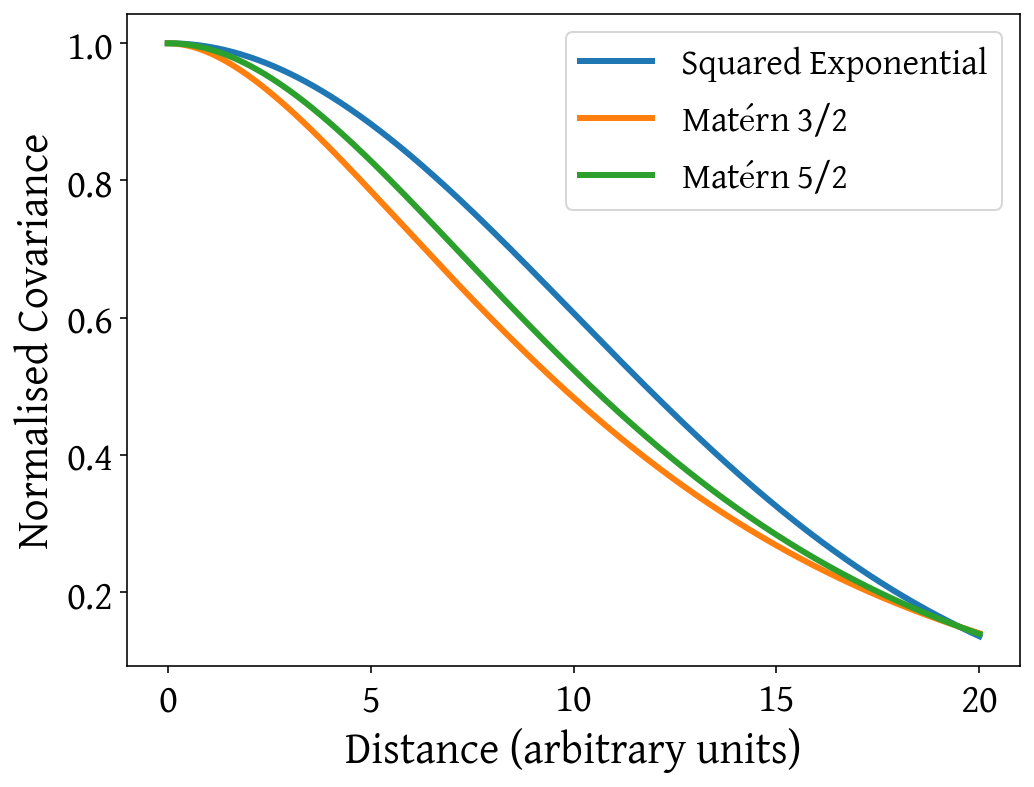

In [10]:
fontsize = 22
f, ax = plt.subplots(figsize=(8,6))

idx = 0
ax.plot(x-x[idx], ES[idx], label='Squared Exponential', lw=3)
ax.plot(x-x[idx], M32[idx], label = r'Mat$\'{\rm e}$rn 3/2', lw=3)
ax.plot(x-x[idx], M52[idx], label = r'Mat$\'{\rm e}$rn 5/2', lw=3)

ax.set_xlabel('Distance (arbitrary units)', fontsize=fontsize)
ax.set_ylabel('Normalised Covariance', fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(fontsize=18)
plt.savefig('plots/covariance_kernels.pdf', bbox_inches='tight')
plt.show()

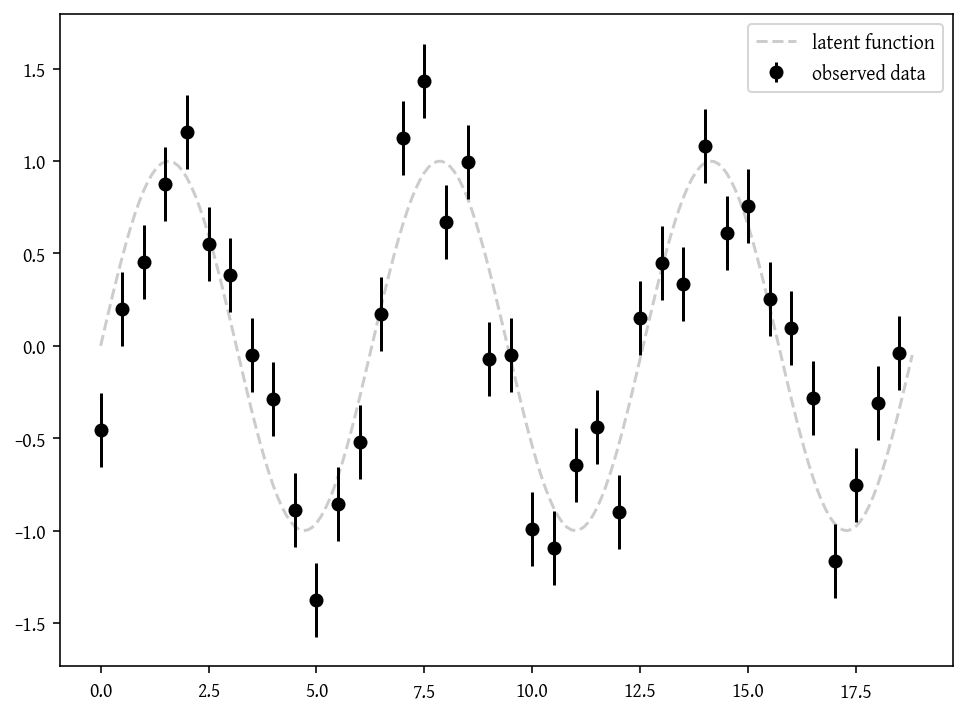

In [3]:
# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

ax.plot(x_true, y_true, '--k', alpha=0.2, label='latent function')
ax.errorbar(x, y, yerr, fmt='ko', label='observed data')
plt.legend();

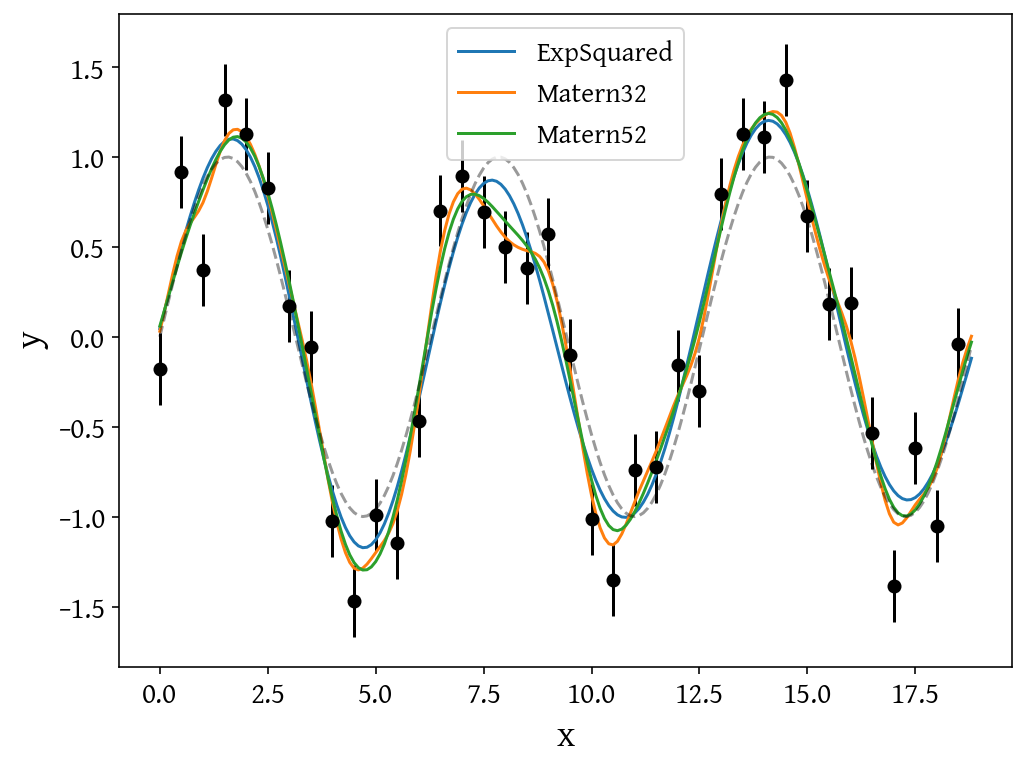

In [4]:
from scipy.optimize import minimize

kernel_name = ['ExpSquared', 'Matern32', 'Matern52']
kernel1 = 1.0*george.kernels.ExpSquaredKernel(5.0)
kernel2 = 1.0*george.kernels.Matern32Kernel(5.0)
kernel3 = 1.0*george.kernels.Matern52Kernel(5.0)
kernels = [kernel1, kernel2, kernel3]

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

for name, k in zip(kernel_name, kernels):

    gp = george.GP(k)
    gp.compute(x, yerr)
    y_pred, pred_var = gp.predict(y, x_pred, return_var=True)
    
    ax.plot(x_pred, y_pred, lw=1.5, label=f'{name}')
    
ax.plot(x_true, y_true, '--k', alpha=0.4)
ax.errorbar(x, y, yerr=yerr, fmt="ok")

ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.legend(fontsize=14);
#plt.savefig('plots/kernels.pdf')

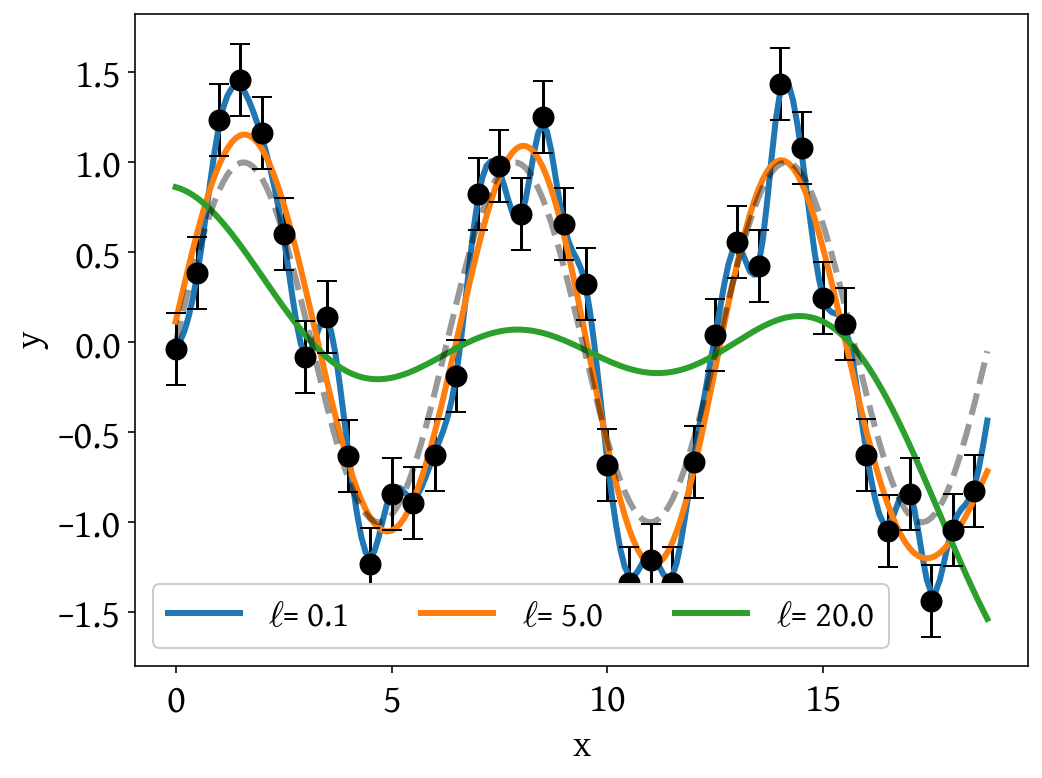

In [5]:
from scipy.optimize import minimize

lengths = [0.1, 5.0, 20.0]
kernel1 = 1.0*george.kernels.ExpSquaredKernel(lengths[0])
kernel2 = 1.0*george.kernels.ExpSquaredKernel(lengths[1])
kernel3 = 1.0*george.kernels.ExpSquaredKernel(lengths[2])
kernels = [kernel1, kernel2, kernel3]

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

for l, k in zip(lengths, kernels):

    gp = george.GP(k)
    gp.compute(x, yerr)
    y_pred, pred_var = gp.predict(y, x_pred, return_var=True)
    
    ax.plot(x_pred, y_pred, lw=3, label=r'$\ell$= '+str(l))
    
ax.plot(x_true, y_true, '--k', alpha=0.4, lw=3)
ax.errorbar(x, y, yerr=yerr, fmt="ok", ms=10, capsize=5)

ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(fontsize=18, ncol=3, framealpha=1)
plt.savefig('plots/kernels_length_scale.pdf', bbox_inches='tight')
plt.show()

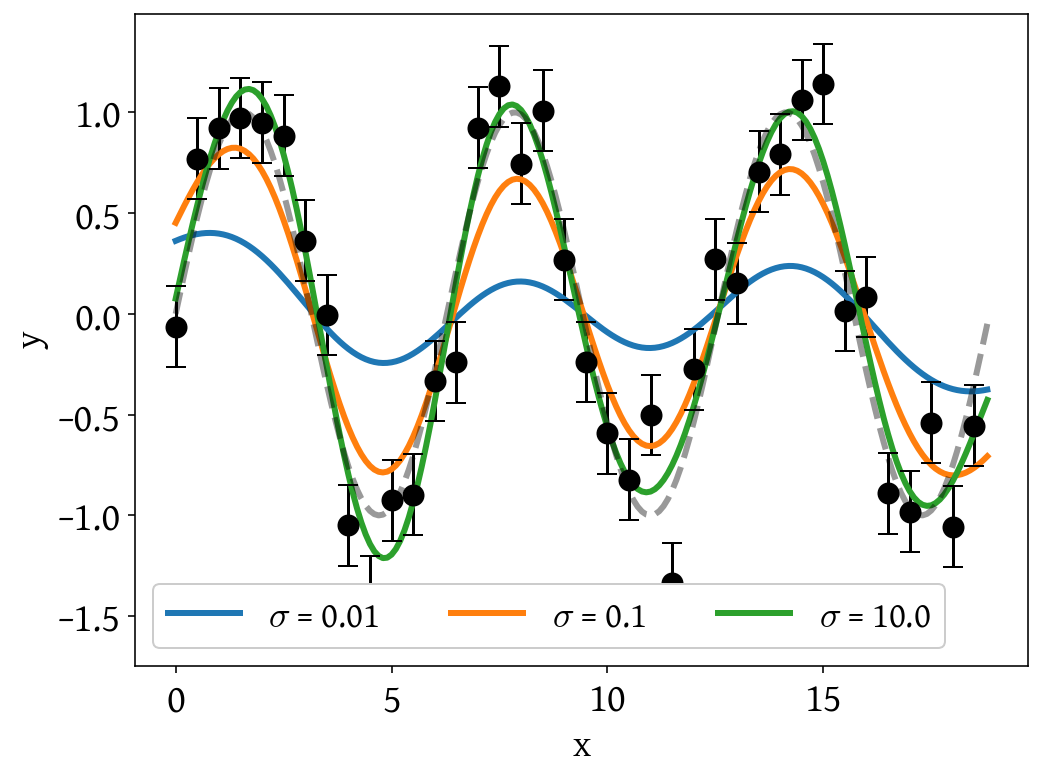

In [6]:
from scipy.optimize import minimize

sig_sq = [.01, .1, 10.0]
kernel1 = sig_sq[0]*george.kernels.ExpSquaredKernel(5.0)
kernel2 = sig_sq[1]*george.kernels.ExpSquaredKernel(5.0)
kernel3 = sig_sq[2]*george.kernels.ExpSquaredKernel(5.0)
kernels = [kernel1, kernel2, kernel3]

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

for s, k in zip(sig_sq, kernels):

    gp = george.GP(k)
    gp.compute(x, yerr)
    y_pred, pred_var = gp.predict(y, x_pred, return_var=True)

    #lt.fill_between(x_pred, y_pred - np.sqrt(pred_var), y_pred + np.sqrt(pred_var), 
    #                alpha=0.4)
    plt.plot(x_pred, y_pred, lw=3, label=r'$\sigma$ = '+str(s))

ax.plot(x_true, y_true, '--k', alpha=0.4, lw=3)
ax.errorbar(x, y, yerr=yerr, fmt="ok", ms=10, capsize=5)

ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(fontsize=18, ncol=3, framealpha=1)
plt.savefig('plots/kernels_variance.pdf', bbox_inches='tight')
plt.show()

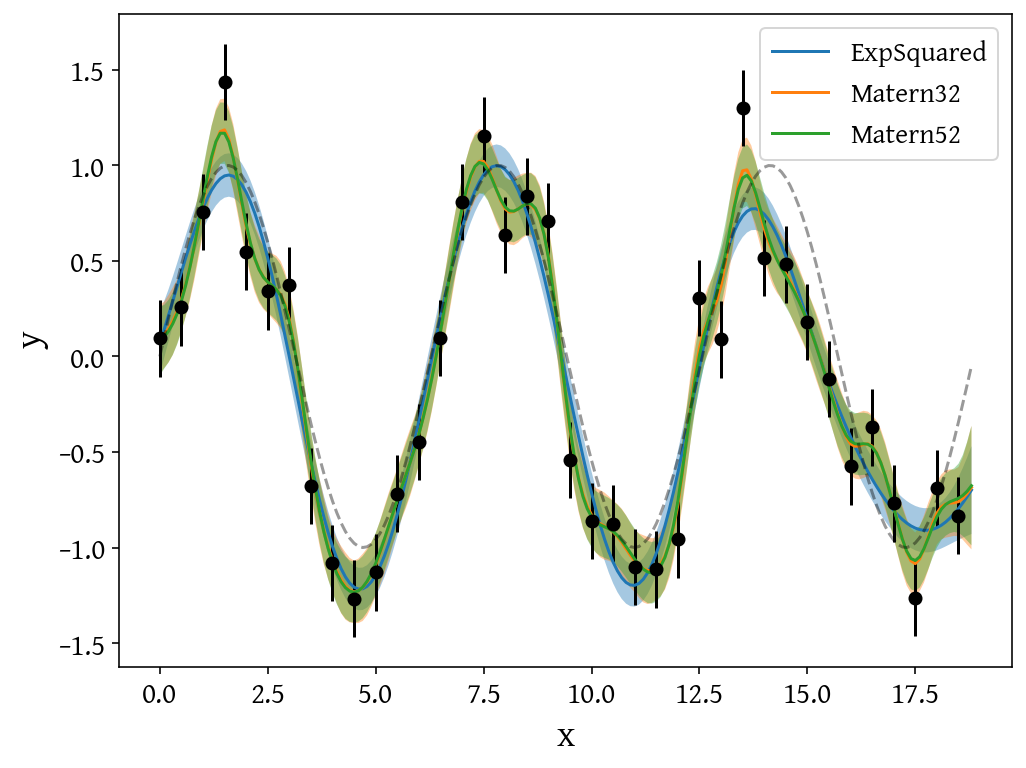

In [7]:
from scipy.optimize import minimize

kernel_name = ['ExpSquared', 'Matern32', 'Matern52']
kernel1 = 1.0*george.kernels.ExpSquaredKernel(5.0)
kernel2 = 1.0*george.kernels.Matern32Kernel(5.0)
kernel3 = 1.0*george.kernels.Matern52Kernel(5.0)
kernels = [kernel1, kernel2, kernel3]

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

fontsize = 18
f, ax = plt.subplots(figsize=(8,6))

for name, k in zip(kernel_name, kernels):

    gp = george.GP(k)
    gp.compute(x, yerr)
    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    gp.set_parameter_vector(result.x)
    y_pred, pred_var = gp.predict(y, x_pred, return_var=True)
    
    plt.fill_between(x_pred, y_pred - np.sqrt(pred_var), y_pred + np.sqrt(pred_var), 
                     alpha=0.4)
    plt.plot(x_pred, y_pred, lw=1.5, label=f'{name}')

ax.plot(x_true, y_true, '--k', alpha=0.4)
ax.errorbar(x, y, yerr=yerr, fmt="ok")

ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.legend(fontsize=14);

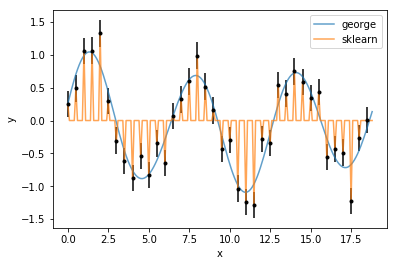

In [43]:
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor

kernel_george = 2.0 * george.kernels.ExpSquaredKernel(5.0)
kernel_sklearn = 2.0 * Matern(length_scale=5.0, nu=5/2)

# set up data
x_true = np.arange(0, 6*np.pi, 0.1)
y_true = np.sin(x_true)

# sample
x = np.arange(0, 6*np.pi, 0.5)
y = np.sin(x) + np.random.rand(len(x))-0.5
yerr = 0.2

x_pred = np.copy(x_true)

# george
gp = george.GP(kernel_george)
gp.compute(x, yerr)
y_pred, pred_var = gp.predict(y, x_pred, return_var=True)
plt.plot(x_pred, y_pred, lw=1.5, alpha=0.7, label='george')

# sklearn
gp = GaussianProcessRegressor(kernel=kernel_sklearn).fit(x[:, None], y)
y_pred, pred_var = gp.predict(x_pred[:, None], return_cov=True)
plt.plot(x_pred, y_pred, lw=1.5, alpha=0.7, label='sklearn')

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

___


In [11]:
import piscola as pisco
import numpy as np
import matplotlib.pyplot as plt

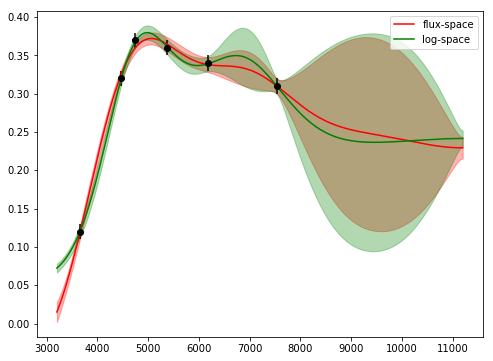

In [12]:
scale = 100  # to avoid negative numbers

wave = np.asarray([3652.522, 4472.3559, 4746.8983, 5365.403, 6176.135182, 7535.821])
flux = np.asarray([0.12, 0.32, 0.37, 0.36, 0.34, 0.31])
flux_err = np.asarray([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

x_edges = [3400, 11000]

# flux space
wave_gp, flux_gp, flux_err_gp = pisco.fit_gp(wave, flux, flux_err, mangling=True, x_edges=x_edges)

# log space
mag = scale + np.log10(flux)
mag_err = np.abs(flux_err/(flux*np.log(10)))

wave_gp, mag_gp, mag_err_gp = pisco.fit_gp(wave, mag, mag_err, mangling=True, x_edges=x_edges)

flux_gp_log = 10**(mag_gp - scale)
flux_err_gp_log = np.abs(flux_gp_log*np.log(10)*mag_err_gp)

# plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(wave, flux, flux_err, fmt='o', color='k')

ax.plot(wave_gp, flux_gp, color='r', label='flux-space')
ax.fill_between(wave_gp, flux_gp-flux_err_gp, flux_gp+flux_err_gp, alpha=0.3, color='r')

ax.plot(wave_gp, flux_gp_log, color='g', label='log-space')
ax.fill_between(wave_gp, flux_gp_log-flux_err_gp_log, flux_gp_log+flux_err_gp_log, alpha=0.3, color='g')

plt.legend()
plt.show()

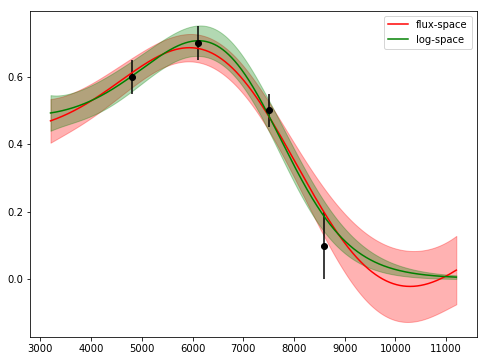

In [9]:
scale = 100  # to avoid negative numbers

wave = np.asarray([4800.0, 6100.0, 7500.0, 8600.0])
flux = np.asarray([0.6, 0.7, 0.5, 0.1])
flux_err = np.asarray([0.05, 0.05, 0.05, 0.1])

x_edges = [3400, 11000]

# flux space
wave_gp, flux_gp, flux_err_gp = pisco.fit_gp(wave, flux, flux_err, mangling=True, x_edges=x_edges)

# log space
mag = scale + np.log10(flux)
mag_err = np.abs(flux_err/(flux*np.log(10)))

wave_gp, mag_gp, mag_err_gp = pisco.fit_gp(wave, mag, mag_err, mangling=True, x_edges=x_edges)

flux_gp_log = 10**(mag_gp - scale)
flux_err_gp_log = np.abs(flux_gp_log*np.log(10)*mag_err_gp)

# plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(wave, flux, flux_err, fmt='o', color='k')

ax.plot(wave_gp, flux_gp, color='r', label='flux-space')
ax.fill_between(wave_gp, flux_gp-flux_err_gp, flux_gp+flux_err_gp, alpha=0.3, color='r')

ax.plot(wave_gp, flux_gp_log, color='g', label='log-space')
ax.fill_between(wave_gp, flux_gp_log-flux_err_gp_log, flux_gp_log+flux_err_gp_log, alpha=0.3, color='g')

plt.legend()
plt.show()

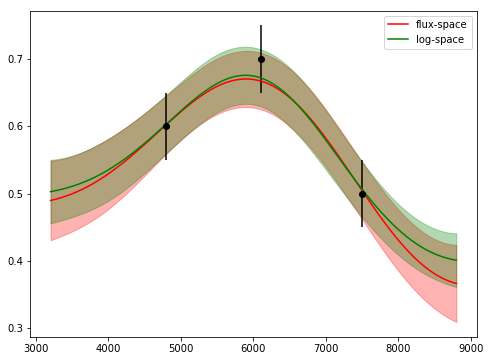

In [7]:
scale = 100  # to avoid negative numbers

wave = np.asarray([4800.0, 6100.0, 7500.0])
flux = np.asarray([0.6, 0.7, 0.5])
flux_err = np.asarray([0.05, 0.05, 0.05])

x_edges = [3400, 8600]

# flux space
wave_gp, flux_gp, flux_err_gp = pisco.fit_gp(wave, flux, flux_err, mangling=True, x_edges=x_edges)

# log space
mag = scale + np.log10(flux)
mag_err = np.abs(flux_err/(flux*np.log(10)))

wave_gp, mag_gp, mag_err_gp = pisco.fit_gp(wave, mag, mag_err, mangling=True, x_edges=x_edges)

flux_gp_log = 10**(mag_gp - scale)
flux_err_gp_log = np.abs(flux_gp_log*np.log(10)*mag_err_gp)

# plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(wave, flux, flux_err, fmt='o', color='k')

ax.plot(wave_gp, flux_gp, color='r', label='flux-space')
ax.fill_between(wave_gp, flux_gp-flux_err_gp, flux_gp+flux_err_gp, alpha=0.3, color='r')

ax.plot(wave_gp, flux_gp_log, color='g', label='log-space')
ax.fill_between(wave_gp, flux_gp_log-flux_err_gp_log, flux_gp_log+flux_err_gp_log, alpha=0.3, color='g')

plt.legend()
plt.show()

___

In [3]:
import numpy as np
import george
import scipy
import emcee

def fit_gp(x_data, y_data, yerr_data=0.0):
    
    # define the objective function (negative log-likelihood in this case)
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    # and the gradient of the objective function
    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)

    x, y, yerr = np.copy(x_data), np.copy(y_data), np.copy(yerr_data)    
    x_norm = 1e3
                
    # normalise the data for better results
    y_norm = y.max()
    y /= y_norm 
    yerr /= y_norm
    mean_function = y.min()
    x /= x_norm
    
    var, length = np.var(y), np.diff(x).max()
        
    k = var * george.kernels.Matern52Kernel(length)
    #k = var * george.kernels.ExpSquaredKernel(length)

    gp = george.GP(kernel=k, solver=george.HODLRSolver, mean=mean_function)
    gp.compute(x, yerr)
    
    opt = 'scipy'
    
    # optimization routine for hyperparameters
    if opt != 'mcmc':
        p0 = gp.get_parameter_vector()
        results = scipy.optimize.minimize(neg_ln_like, p0, jac=grad_neg_ln_like)
        gp.set_parameter_vector(results.x)
    
    else:
        # NOT WORKING
        p0 = gp.get_parameter_vector()
        ndim, nwalkers = len(p0), 32
        sampler = emcee.EnsembleSampler(nwalkers, ndim, neg_ln_like)

        # Running first burn-in...
        p0 = p0 + 1e-8 * np.random.randn(nwalkers, ndim)
        p0, lp, _ = sampler.run_mcmc(p0, 1000)

        # Running second burn-in...
        p0 = p0[np.argmax(lp)] + 1e-8 * np.random.randn(nwalkers, ndim)
        sampler.reset()
        p0, _, _ = sampler.run_mcmc(p0, 2000)
        sampler.reset()

        # Running production...
        sampler.run_mcmc(p0, 2000);

        samples = sampler.flatchain
        results = [np.mean(samples[:, 0]), np.mean(samples[:, 1])]
        gp.set_parameter_vector(results)
    
    ##########################
    step = 1e-3
    t = np.arange(x.min(), x.max()+step, step)
    
    mu, var = gp.predict(y, t, return_var=True)
    std = np.sqrt(var)
    
    return t*x_norm, mu*y_norm, std*y_norm

/home/tem1u17/anaconda3/envs/pysco/lib/python3.7/site-packages/ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  
/home/tem1u17/anaconda3/envs/pysco/lib/python3.7/site-packages/ipykernel_launcher.py:40: RankWarning: Polyfit may be poorly conditioned


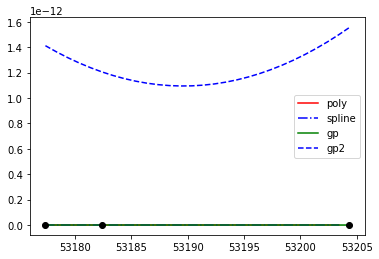

In [9]:
import piscola as pisco
import numpy as np
from scipy.interpolate import UnivariateSpline

sn = pisco.load_sn('04D3oe', path='obj_pantheon/')

# data
band = 'Megacam_z'
flux = sn.data[band]['flux']
flux_err = sn.data[band]['flux_err']
mjd = sn.data[band]['mjd']

# poly
poly = np.poly1d(np.polyfit(mjd, flux, deg=3, w=1/flux_err**2))
x = np.arange(mjd.min(), mjd.max(), 1)

# spline
spl = UnivariateSpline(mjd, flux, w=1/flux_err**2, k=2)

# gp
x_gp, y_gp, yerr_gp = fit_gp(mjd, flux, flux_err)

# gp2
x_gp2, y_gp2, yerr_gp2 = fit_gp2(mjd, flux, flux_err)

# plot
plt.errorbar(mjd, flux, flux_err, fmt='o', color='k')
plt.plot(x, poly(x), label='poly', color='r')
plt.plot(x, spl(x), label='spline', ls='-.', color='b')
plt.plot(x_gp, y_gp, color='g', label='gp')
plt.plot(x_gp2, y_gp2, color='b', ls='--', label='gp2')
plt.fill_between(x_gp, y_gp+yerr_gp, y_gp-yerr_gp, color='g', alpha=0.3)
plt.legend()
plt.show()

In [5]:
import numpy as np
import george
from george.modeling import Model
import scipy

class mean_function(Model):
    parameter_names = ("a0", "a1", "a2", "a3")

    def get_value(self, t):
        return self.a0 + self.a1*t + self.a2*(t**2) + self.a3*(t**3)
    

def fit_gp2(x_data, y_data, yerr_data=0.0):
    
    # define the objective function (negative log-likelihood in this case)
    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(y)

    # and the gradient of the objective function
    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(y)
    
    def lnprob(p):
        gp.set_parameter_vector(p)
        return gp.log_likelihood(y, quiet=True) + gp.log_prior()

    x, y, yerr = np.copy(x_data), np.copy(y_data), np.copy(yerr_data)    
    x_norm = 1e3
                
    # normalise the data for better results
    y_norm = y.max()
    y /= y_norm 
    yerr /= y_norm
    mean_model = y.min()
    x /= x_norm
    
    # mean function
    a0, a1, a2, a3 = np.polyfit(x, y, 3, w=1/yerr**2)[::-1]
    mean_model = mean_function(a0=a0, a1=a1, a2=a2, a3=a3)
    
    var, length = np.var(y), np.diff(x).max()
        
    k = var * george.kernels.Matern52Kernel(length)
    
    gp = george.GP(kernel=k, solver=george.HODLRSolver, mean=mean_model)
    gp.compute(x, yerr)
    
    # optimization routine for hyperparameters
    p0 = gp.get_parameter_vector()
    #results = scipy.optimize.minimize(neg_ln_like, p0)
    results = scipy.optimize.minimize(lnprob, p0)
    gp.set_parameter_vector(results.x)
    
    step = 1e-3
    t = np.arange(x.min(), x.max()+step, step)
    
    mu, var = gp.predict(y, t, return_var=True)
    std = np.sqrt(var)
    
    return t*x_norm, mu*y_norm, std*y_norm